# Matplotlib Charts
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [matplotlib_charts.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Visualization-Tools/matplotlib_charts.ipynb)
---
Examples of chart visualization using *Matplotlib*.

<font color="#CC0000">[<b>PT-BR<b> content]</font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

## 1. Gráficos
---
Exemplos de gráficos separados por tipos e utilizando dados criados aleatoriamente.

### 1.1. Linha
---
- **Linha** [*plot*]: Visualização de gráfico linha linear.
- **Linhas**: Visualização de gráfico linha com variação de estilo e marcação.

In [3]:
# Dados para linha
N = 8
t = np.linspace(0, 1, N)

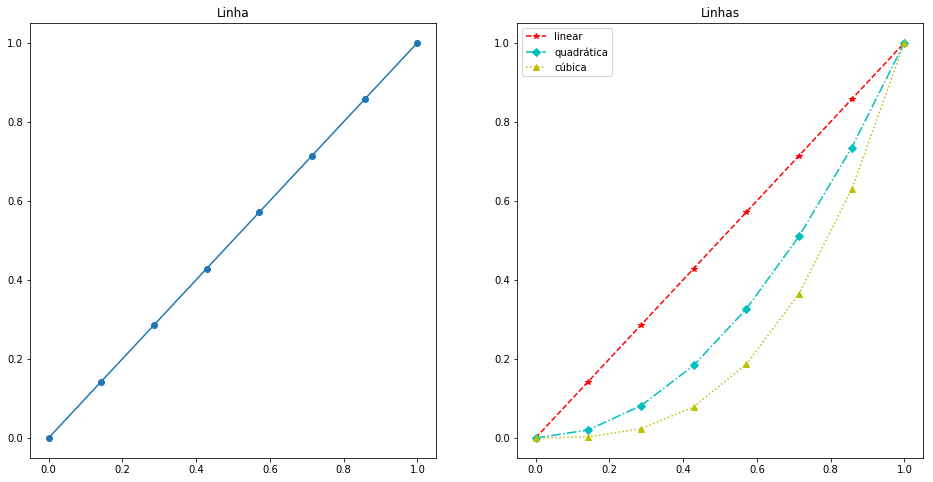

Wall time: 247 ms


In [4]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Linha
axA.plot(t, t, marker = 'o')
axA.set_title('Linha')

# Linhas
axB.plot(t, t, linestyle='--', marker='*',
         c='r', label='linear')
axB.plot(t, t**2, linestyle='-.', marker='D',
         c='c', label='quadrática')
axB.plot(t, t**3, linestyle=':', marker='^',
         c='y', label='cúbica')
axB.set_title('Linhas')
plt.legend()
plt.show()

### 1.2. Dispersão
---
- **Dispersão** [*scatter*]: Visualização de gráfico de disperção, com variação de cor.
- **Dispersão em bolha** [*bubble chart*]: Visualização de gráfico de disperção, com variação de cor e escala.

In [5]:
# Dados para dispersão
N = 128
x = np.random.rand(N)
y = np.random.rand(N)
c = np.random.rand(N)
s = np.random.rand(N)
s = np.pi*(32*s)**2

In [6]:
cmapDisp = cm.get_cmap('rainbow')

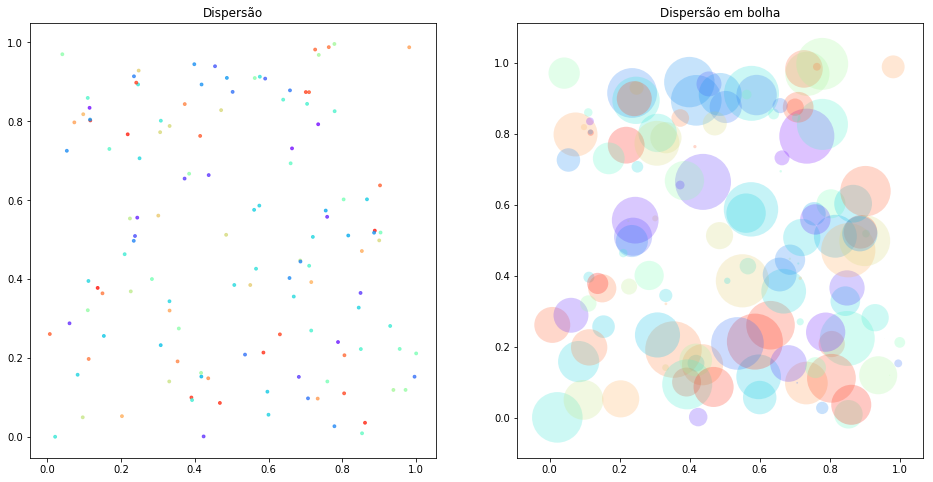

Wall time: 210 ms


In [7]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Dispersão
axA.scatter(x, y, s=8,
            c=cmapDisp(c),
            alpha=0.75)
axA.set_title('Dispersão')

# Dispersão em bolha
axB.scatter(x, y, c=cmapDisp(c), s=s,
            alpha=0.25, edgecolors='none')
axB.set_title('Dispersão em bolha')
plt.show()

### 1.3. Barra
---
- **Barras** [*bar chart*]: Visualização de gráfico em barras agrupados paralelamente.
- **Barras empilhadas** [*bar chart stacked*]: Visualização de gráfico em barras agrupados de forma empilhada.

In [8]:
# Dados para barras
N = 8
# média
Hx = np.random.randint(18, 65, size=N)
Mx = np.random.randint(18, 65, size=N)
# desvio padrão
Hs = np.random.randint(1, 5, size=N)
Ms = np.random.randint(1, 5, size=N)

In [9]:
# Parâmetros de visualização
indice = np.arange(N) + 1
igrupos = ['G{}'.format(g) for g in indice]
iidades = np.arange(0, 80, 5)
larg = 0.25

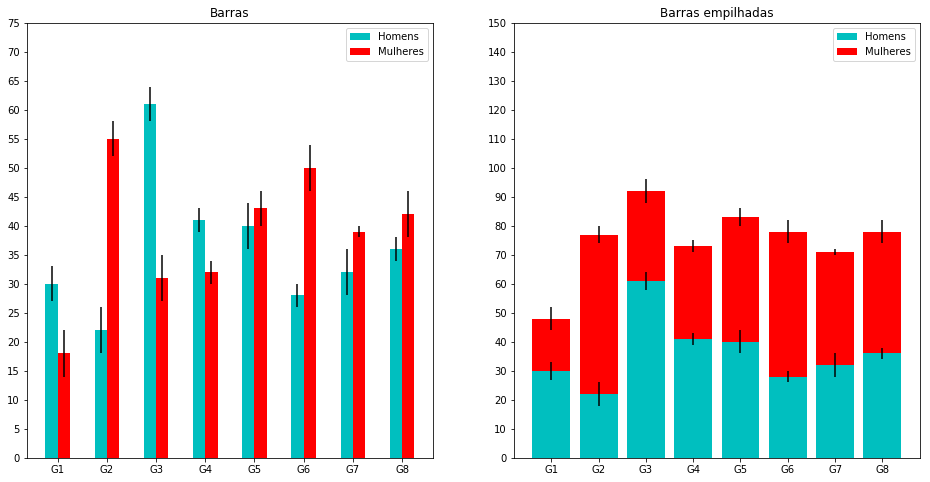

Wall time: 279 ms


In [10]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Barras
axA.bar(indice - larg, Hx, width=larg, yerr=Hs,
       color='c', align='edge', label='Homens')
axA.bar(indice, Mx, width=larg, yerr=Ms,
        color='r', align='edge', label='Mulheres')
axA.set_title('Barras')
axA.set_xticks(indice)
axA.set_yticks(iidades)
axA.set_xticklabels(igrupos)
axA.legend()

# Barras empilhadas
axB.bar(indice, Hx, color='c', label='Homens', yerr=Hs)
axB.bar(indice, Mx, color='r', bottom=Hx, label='Mulheres', yerr=Ms)
axB.set_title('Barras empilhadas')
axB.set_xticks(indice)
axB.set_xticklabels(igrupos)
axB.set_yticks(iidades*2)
axB.legend()
plt.show()

### 1.4. Radial
---
- **Pizza | Rosca** [*pie chart*]: Visualização de gráfico rosca com duas camadas de informação(*valor* e *variação*).
- **Radar** [*radar chart*]: Visualização de gráfico radar, tendo *valores* com base central e a *variação* com base radial.

In [11]:
# Dados para radial
etiqueta = list('ABCDEFGHIJKL')
M, N = 128, len(etiqueta)
valor = np.random.random(N)*0.9 + 0.1
var = np.random.random(M)

In [12]:
# Parâmetros de visualização
cmapRadial = cm.get_cmap('magma')
theta = 2*np.pi*np.arange(N)/N
omega = 2*np.pi*np.arange(M)/M
valor_ = np.append(valor, [valor[0]])
var_ = np.append(var, [var[0]])
theta_ = np.append(theta, [theta[0]])
omega_ = np.append(omega, [omega[0]])
raio = 1.25
mult = 0.15

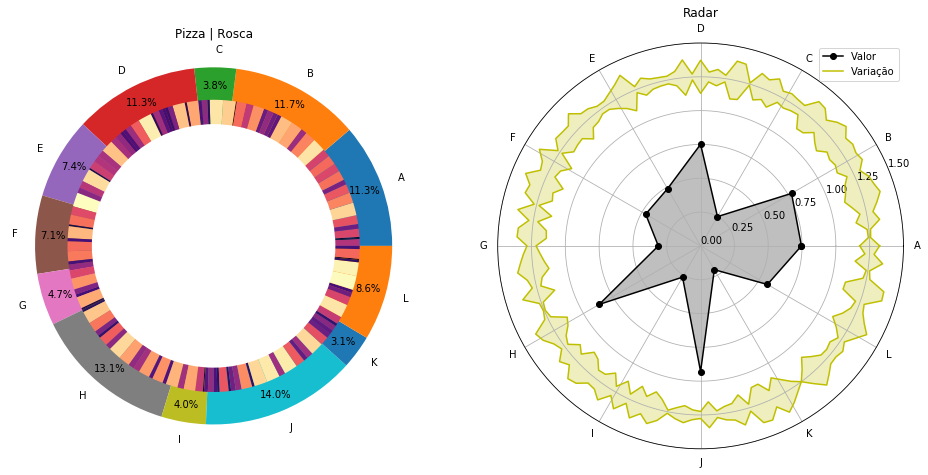

Wall time: 369 ms


In [13]:
%%time
fig = plt.figure()
axA = fig.add_subplot(121, aspect='equal')
axB = fig.add_subplot(122, projection='polar')

# Pizza | Rosca
axA.pie(valor, labels=etiqueta, pctdistance=0.9,
        autopct='%1.1f%%', radius=1.1)
axA.pie(var, radius=0.9, colors=cmapRadial(var))
axA.set_title('Pizza | Rosca')
centro = plt.Circle((0,0), 0.75, fc='white')
axA.add_patch(centro)

# Radar
axB.plot(theta_, valor_, marker='o', color='black', label='Valor')
axB.fill_between(theta_, 0, valor_, facecolor='black', alpha=0.25)
axB.plot(omega_, raio + var_*mult, color='y', label='Variação')
axB.plot(omega_, raio - var_*mult, color='y')
axB.fill_between(omega_, raio - var_*mult, raio + var_*mult,
                 facecolor='y', alpha=0.25)
axB.set_title('Radar')
axB.set_xticks(theta)
axB.set_xticklabels(etiqueta)
axB.set_rticks(np.linspace(0, 1.5, 7))
axB.legend()
plt.show()

### 1.5. Área
---
- **Área empilhada** [*100% stacked area*]: Visualização de gráfico de área empilhada 100%.
- **Mapa de árvore** [*treemap*]: Visualização de mapa de árvore com auxílio do [squarify](https://pypi.python.org/pypi/squarify).

In [14]:
# Dados para área empilhada
M, N = 16, 4
dadosEmp = np.random.random((N, M))*0.9 + 0.1
empilha = 100*dadosEmp/np.sum(dadosEmp, axis=0)

# Dados para mapa de árvore
folhas = 64
area = np.random.random(folhas)*3 + 1
area = np.round_(area, decimals=2)
cores = np.random.random(folhas)
lado = area.sum()**0.5

In [15]:
# Parâmetros de visualização
cmapArvore = cm.get_cmap('rainbow')
cores = cmapArvore(cores)

from squarify import squarify
partes = squarify(area, 0, 0, lado, lado)
x = [parte['x'] for parte in partes]
y = [parte['y'] for parte in partes]
dx = [parte['dx'] for parte in partes]
dy = [parte['dy'] for parte in partes]

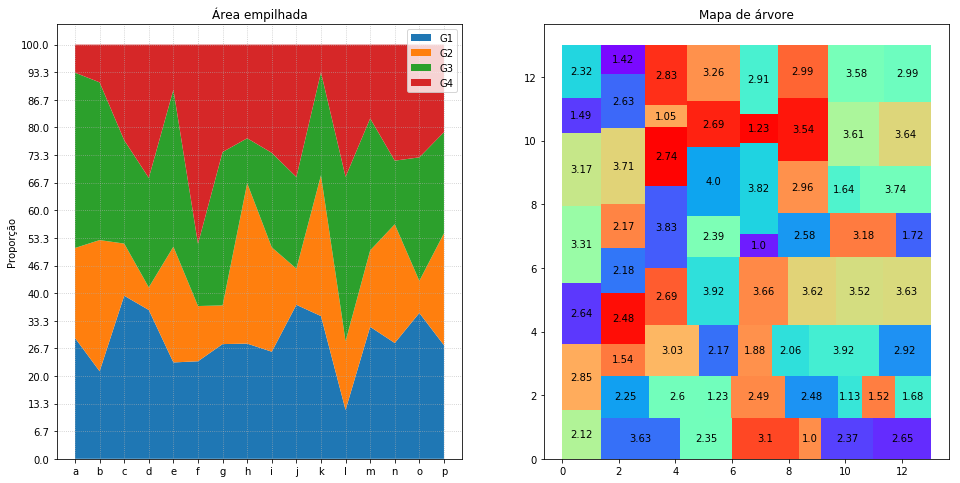

Wall time: 428 ms


In [16]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Área empilhada
axA.stackplot(np.arange(M), empilha, baseline='zero')
axA.set_title('Área empilhada')
axA.set_ylabel('Proporção')
axA.set_xticks(np.arange(M))
axA.set_yticks(np.linspace(0, 100, M))
axA.set_xticklabels([chr(i + ord('a')) for i in range(M)])
axA.legend(['G{}'.format(i + 1) for i in range(N)])
axA.grid(alpha=0.75, linestyle=':')

# Mapa de árvore
axB.bar(x, dy, width=dx, bottom=y, color=cores, align='edge')
for p, a in zip(partes, area):
    x, y, dx, dy = p['x'], p['y'], p['dx'], p['dy']
    axB.text(x + dx*0.5, y + dy*0.5, a, va='center', ha='center')
axB.set_title('Mapa de árvore')
plt.show()

### 1.6. Estatístico
---
- **Caixa + Violino** [*box plot + violin plot*]: Visualização de gráfico de caixa e violino.
- **Histograma** [*Histogram*]: Visualização de histograma empilhado.

In [17]:
# Dados para estatísticos
entrev_dia = 1000
dias = ['seg', 'ter', 'qua', 'qui', 'sex']
ndias = len(dias)
mu = 4 + np.random.random(ndias)*2
sigma = 0.5 + np.random.random(ndias)*2
horas = np.random.normal(mu, sigma, (entrev_dia, ndias))
horas += np.random.random((entrev_dia, ndias))*2 - 1

In [18]:
# Parâmetros de visualização
cmapStat = cm.get_cmap('cool')
posicao = np.arange(ndias)*1.5

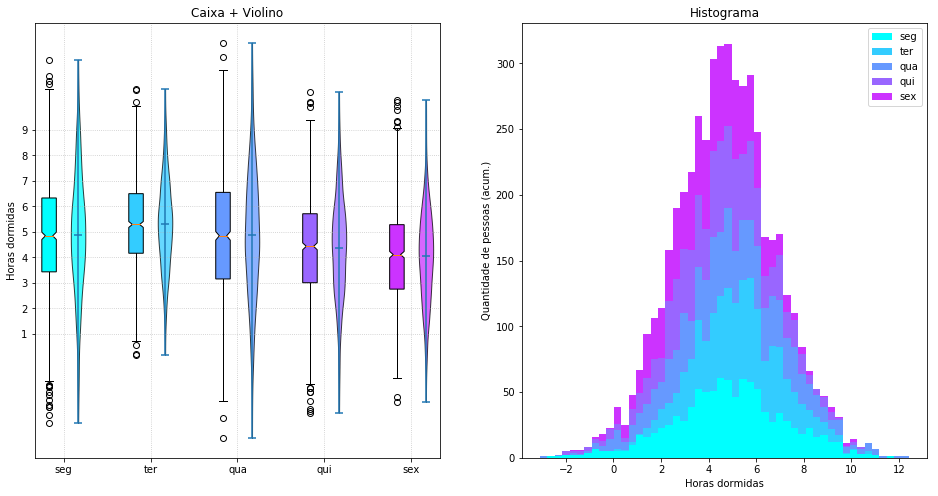

Wall time: 644 ms


In [19]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Caixa + Violino
bplots = axA.boxplot(horas, positions=posicao - 0.25,
                     vert=True, widths=0.25,
                     patch_artist=True, notch=True)
violins = axA.violinplot(horas, positions=posicao + 0.25,
                         widths=0.25, showmeans=True)
for i, (box, violin) in enumerate(zip(bplots['boxes'], violins['bodies'])):
    cor = cmapStat(i/ndias)
    box.set_facecolor(cor)
    violin.set_facecolor(cor)
    violin.set_edgecolor('black')
    violin.set_alpha(0.75)
axA.set_title('Caixa + Violino')
axA.set_ylabel('Horas dormidas')
axA.set_xticks(posicao)
axA.set_yticks(range(1, 10))
axA.set_xticklabels(dias)
axA.set_xlim((-0.5, 6.5))
axA.grid(alpha=0.75, linestyle=':')

# Histogram
n, bins, patches = axB.hist(horas, bins=50, stacked=True)
for i, patchList in enumerate(patches):
    for patch in patchList:
        patch.set_facecolor(cmapStat(i/ndias))
axB.set_title('Histograma')
axB.set_xlabel('Horas dormidas')
axB.set_ylabel('Quantidade de pessoas (acum.)')
axB.legend(dias)
plt.show()